## Line total files per month

In [6]:
import pandas as pd 
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns


In [8]:
df_street = pd.read_csv('data/metro_street.csv')

In [9]:
df_street.dropna(subset=['Borough'], inplace=True)

In [174]:
#districts_to_include = df_street[df_street['LSOA name'].str.startswith("City")]['LSOA name'].unique()

In [175]:
#df_street_cleaned = df_street[df_street['LSOA name'].isin(districts_to_include)]

In [11]:
df_street_cleaned = df_street.drop(columns=['Last outcome category'])
df_street_cleaned = df_street_cleaned[df_street_cleaned['Crime type'] != 'Possession of weapons']

In [12]:
df_street_cleaned['Month'] = pd.to_datetime(df_street_cleaned['Month'])

In [13]:
monthly_dict = {}

for month in df_street_cleaned['Month'].dt.month_name().unique():
    df_month = df_street_cleaned[df_street_cleaned['Month'].dt.month_name() == month]
    monthly_dict[month] = {}
    for lsoa in df_month['Borough'].unique():
        df_lsoa = df_month[df_month['Borough'] == lsoa]
        crimes_per_year = df_lsoa.groupby(df_lsoa['Month'].dt.year).count().Month 
        X = crimes_per_year.index.values.reshape(-1, 1)
        y = crimes_per_year

        model = linear_model.LinearRegression().fit(X, y)
        monthly_dict[month][lsoa] = model.coef_




    


In [14]:
crime_index = pd.read_csv('updated_crime_index.csv')

In [15]:
crime_dict = pd.Series(crime_index['CCHI Score'].values,index=crime_index['SUB_GROUP']).to_dict()

In [16]:
crime_dict

{'Anti-social behaviour': 37.833333333333336,
 'Bicycle theft': 2.0,
 'Burglary': 314.0,
 'Criminal damage and arson': 96.6086956521739,
 'Drugs': 281.8510638297872,
 'Other crime': 5.002542372881355,
 'Other theft': 34.458333333333336,
 'Public disorder and weapons': 182.0,
 'Public order': 71.32432432432432,
 'Robbery': 365.0,
 'Shoplifting': 1.0,
 'Theft from the person': 2.0,
 'Vehicle crime': 6.833333333333333,
 'Violence and sexual offences': 644.2727272727273,
 'Violent crime': 1196.5636363636363}

In [17]:
df_street_cleaned['Crime Score'] = df_street_cleaned['Crime type'].replace(crime_dict)	

In [19]:
coef_list = []
for index, row in df_street_cleaned.iterrows():
    coef = monthly_dict[row['Month'].month_name()][row['Borough']]
    coef_list.append(coef)
df_street_cleaned['Coefficient'] = coef_list

In [20]:
df_street_cleaned['Coefficient'] = df_street_cleaned['Coefficient'].astype('float')

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_street_cleaned[['Crime Score', 'Coefficient']] = scaler.fit_transform(df_street_cleaned[['Crime Score', 'Coefficient']])

In [22]:
df_street_cleaned['Final Coefficient'] = df_street_cleaned['Crime Score'] * df_street_cleaned['Coefficient']

In [23]:
scaler = MinMaxScaler()
df_street_cleaned['Final Coefficient'] = scaler.fit_transform(df_street_cleaned['Final Coefficient'].values.reshape(-1, 1))

In [24]:
df_street_cleaned

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Borough,BCU,Crime Score,Coefficient,Final Coefficient
0,NaN,2014-06-01,Metropolitan Police Service,Metropolitan Police Service,0.133181,51.586719,On or near Rosehatch Avenue,E01000027,Barking and Dagenham 001A,Anti-social behaviour,Barking and Dagenham,EA - East Area,0.030808,0.390762,0.012039
1,NaN,2014-06-01,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,Barking and Dagenham,EA - East Area,0.030808,0.390762,0.012039
2,7b80615f37c236b21945720f533e79857ef85ccecdb23f...,2014-06-01,Metropolitan Police Service,Metropolitan Police Service,0.140634,51.583427,On or near Rams Grove,E01000027,Barking and Dagenham 001A,Burglary,Barking and Dagenham,EA - East Area,0.261801,0.390762,0.102302
3,a912be379fe71146d71cf88a6f084fe839ff915ae321fc...,2014-06-01,Metropolitan Police Service,Metropolitan Police Service,0.140634,51.583427,On or near Rams Grove,E01000027,Barking and Dagenham 001A,Burglary,Barking and Dagenham,EA - East Area,0.261801,0.390762,0.102302
4,6709de471673a064c504fbc556488474d2f8acacfc360f...,2014-06-01,Metropolitan Police Service,Metropolitan Police Service,0.135866,51.587336,On or near Gibbfield Close,E01000027,Barking and Dagenham 001A,Criminal damage and arson,Barking and Dagenham,EA - East Area,0.079970,0.390762,0.031249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6634694,99699d830bae51b6128f0634de7e8359882fd3aa906626...,2019-01-01,Metropolitan Police Service,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,E01004741,Westminster 024F,Public order,Westminster,AW - Central West,0.058821,0.717159,0.042184
6634695,d498e225f0a17eec369d6137fc85ae6aee406d9cb236e8...,2019-01-01,Metropolitan Police Service,Metropolitan Police Service,-0.135532,51.489097,On or near St George'S Square,E01004741,Westminster 024F,Public order,Westminster,AW - Central West,0.058821,0.717159,0.042184
6634696,b4d8096c87e49db53dd334a0053dfa88232f946748d7f9...,2019-01-01,Metropolitan Police Service,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,E01004741,Westminster 024F,Public order,Westminster,AW - Central West,0.058821,0.717159,0.042184
6634697,b4d8096c87e49db53dd334a0053dfa88232f946748d7f9...,2019-01-01,Metropolitan Police Service,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,E01004741,Westminster 024F,Shoplifting,Westminster,AW - Central West,0.000000,0.717159,0.000000


In [ ]:
data = df_street_cleaned.loc[:, ['Longitude', 'Latitude']]
X = data.values
Y = df_street_cleaned['Final Coefficient'].values

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, n_init=10, random_state=0, max_iter=1000)

wt_kmeansclus = kmeans.fit(X,sample_weight = Y)
predicted_kmeans = kmeans.predict(X, sample_weight = Y)


In [ ]:
wt_kmeansclus.cluster_centers_[:,0]

array([-0.10952672, -0.104684  , -0.08790641, -1.621245  ,  0.63836621,
       -0.07588026, -0.08286703, -0.060767  , -0.09717246,  0.326395  ,
       -0.22030023, -0.10256937, -0.09448477, -0.00332634, -0.02292406,
       -0.08954372, -0.07911926, -0.07436497, -0.08301777,  0.06214564])

C:\Users\20204502\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\20204502\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


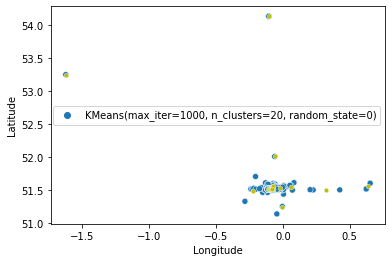

In [ ]:
clustering_plot = sns.scatterplot(X[:,0], X[:, 1], hue=kmeans)
sns.scatterplot(wt_kmeansclus.cluster_centers_[:,0], wt_kmeansclus.cluster_centers_[:,1], s=21, color='y')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()